## NEW VISUALIZATIONS

In [16]:
import hddm

### Generate some Data

In [26]:
# Metadata
nmcmc = 2500
model = 'angle'
n_samples = 1000
includes = hddm.simulators.model_config[model]['hddm_include']

In [27]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 5,
                                                                                  n_samples_by_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

In [28]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.737320,1.0,0,0.105478,1.231885,0.468836,1.273322,0.532642
1,1.614321,1.0,0,0.105478,1.231885,0.468836,1.273322,0.532642
2,1.897318,1.0,0,0.105478,1.231885,0.468836,1.273322,0.532642
3,1.783319,1.0,0,0.105478,1.231885,0.468836,1.273322,0.532642
4,1.605321,0.0,0,0.105478,1.231885,0.468836,1.273322,0.532642
...,...,...,...,...,...,...,...,...
495,1.879133,0.0,4,-1.364279,1.226657,0.455551,1.266137,0.571162
496,1.741134,0.0,4,-1.364279,1.226657,0.455551,1.266137,0.571162
497,1.889132,0.0,4,-1.364279,1.226657,0.455551,1.266137,0.571162
498,1.724134,0.0,4,-1.364279,1.226657,0.455551,1.266137,0.571162


In [29]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.0,
                           w_outlier = 0.01,
                           model = model)

Setting priors uninformative (LANs only work with uninformative priors for now)
Includes supplied:  ['z', 'theta']


In [30]:
# Sample
hddmnn_model.sample(nmcmc,
                    burn = 500)

 [-----------------100%-----------------] 2500 of 2500 complete in 219.1 sec

### Caterpillar Plot

The `caterpillar_plot()` function below displays *parameterwise*, 

-  as a <span style="color:red"> **red** </span> tick-mark the **ground truth**.
-  as a *thin* **black** line the $1 - 99$ percentile range of the posterior distribution
-  as a *thick* **black** line the $5-95$ percentile range of the posterior distribution

Again use the ```help()``` function to learn more.

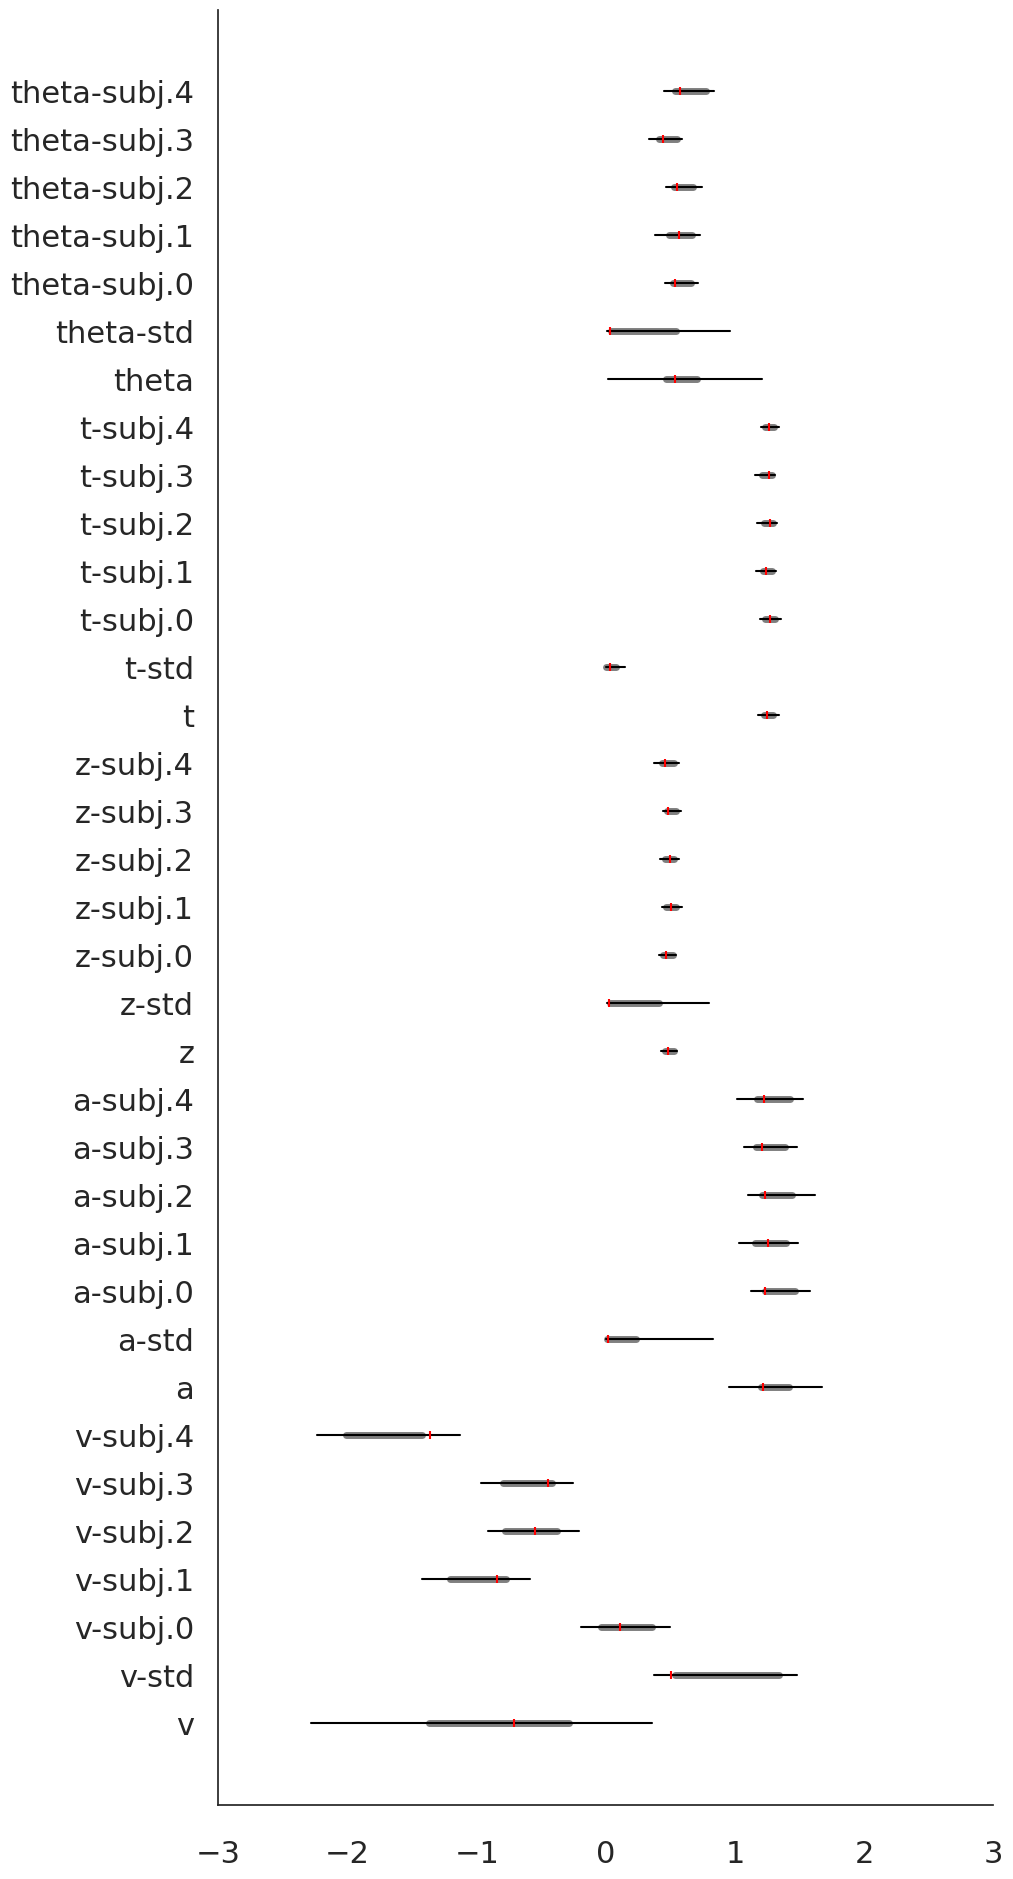

In [31]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.caterpillar_plot(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               drop_sd = False,
                               x_limits = [-3, 3])

### Model Plot

The **model plot** is useful to illustrate the behavior of a models pictorially,
including the uncertainty over model parameters embedded in the posterior distribution.

This plot works only for **2-choice** models at this point.

Check out more of it's capabilities with the `help()` function.

<Figure size 640x480 with 0 Axes>

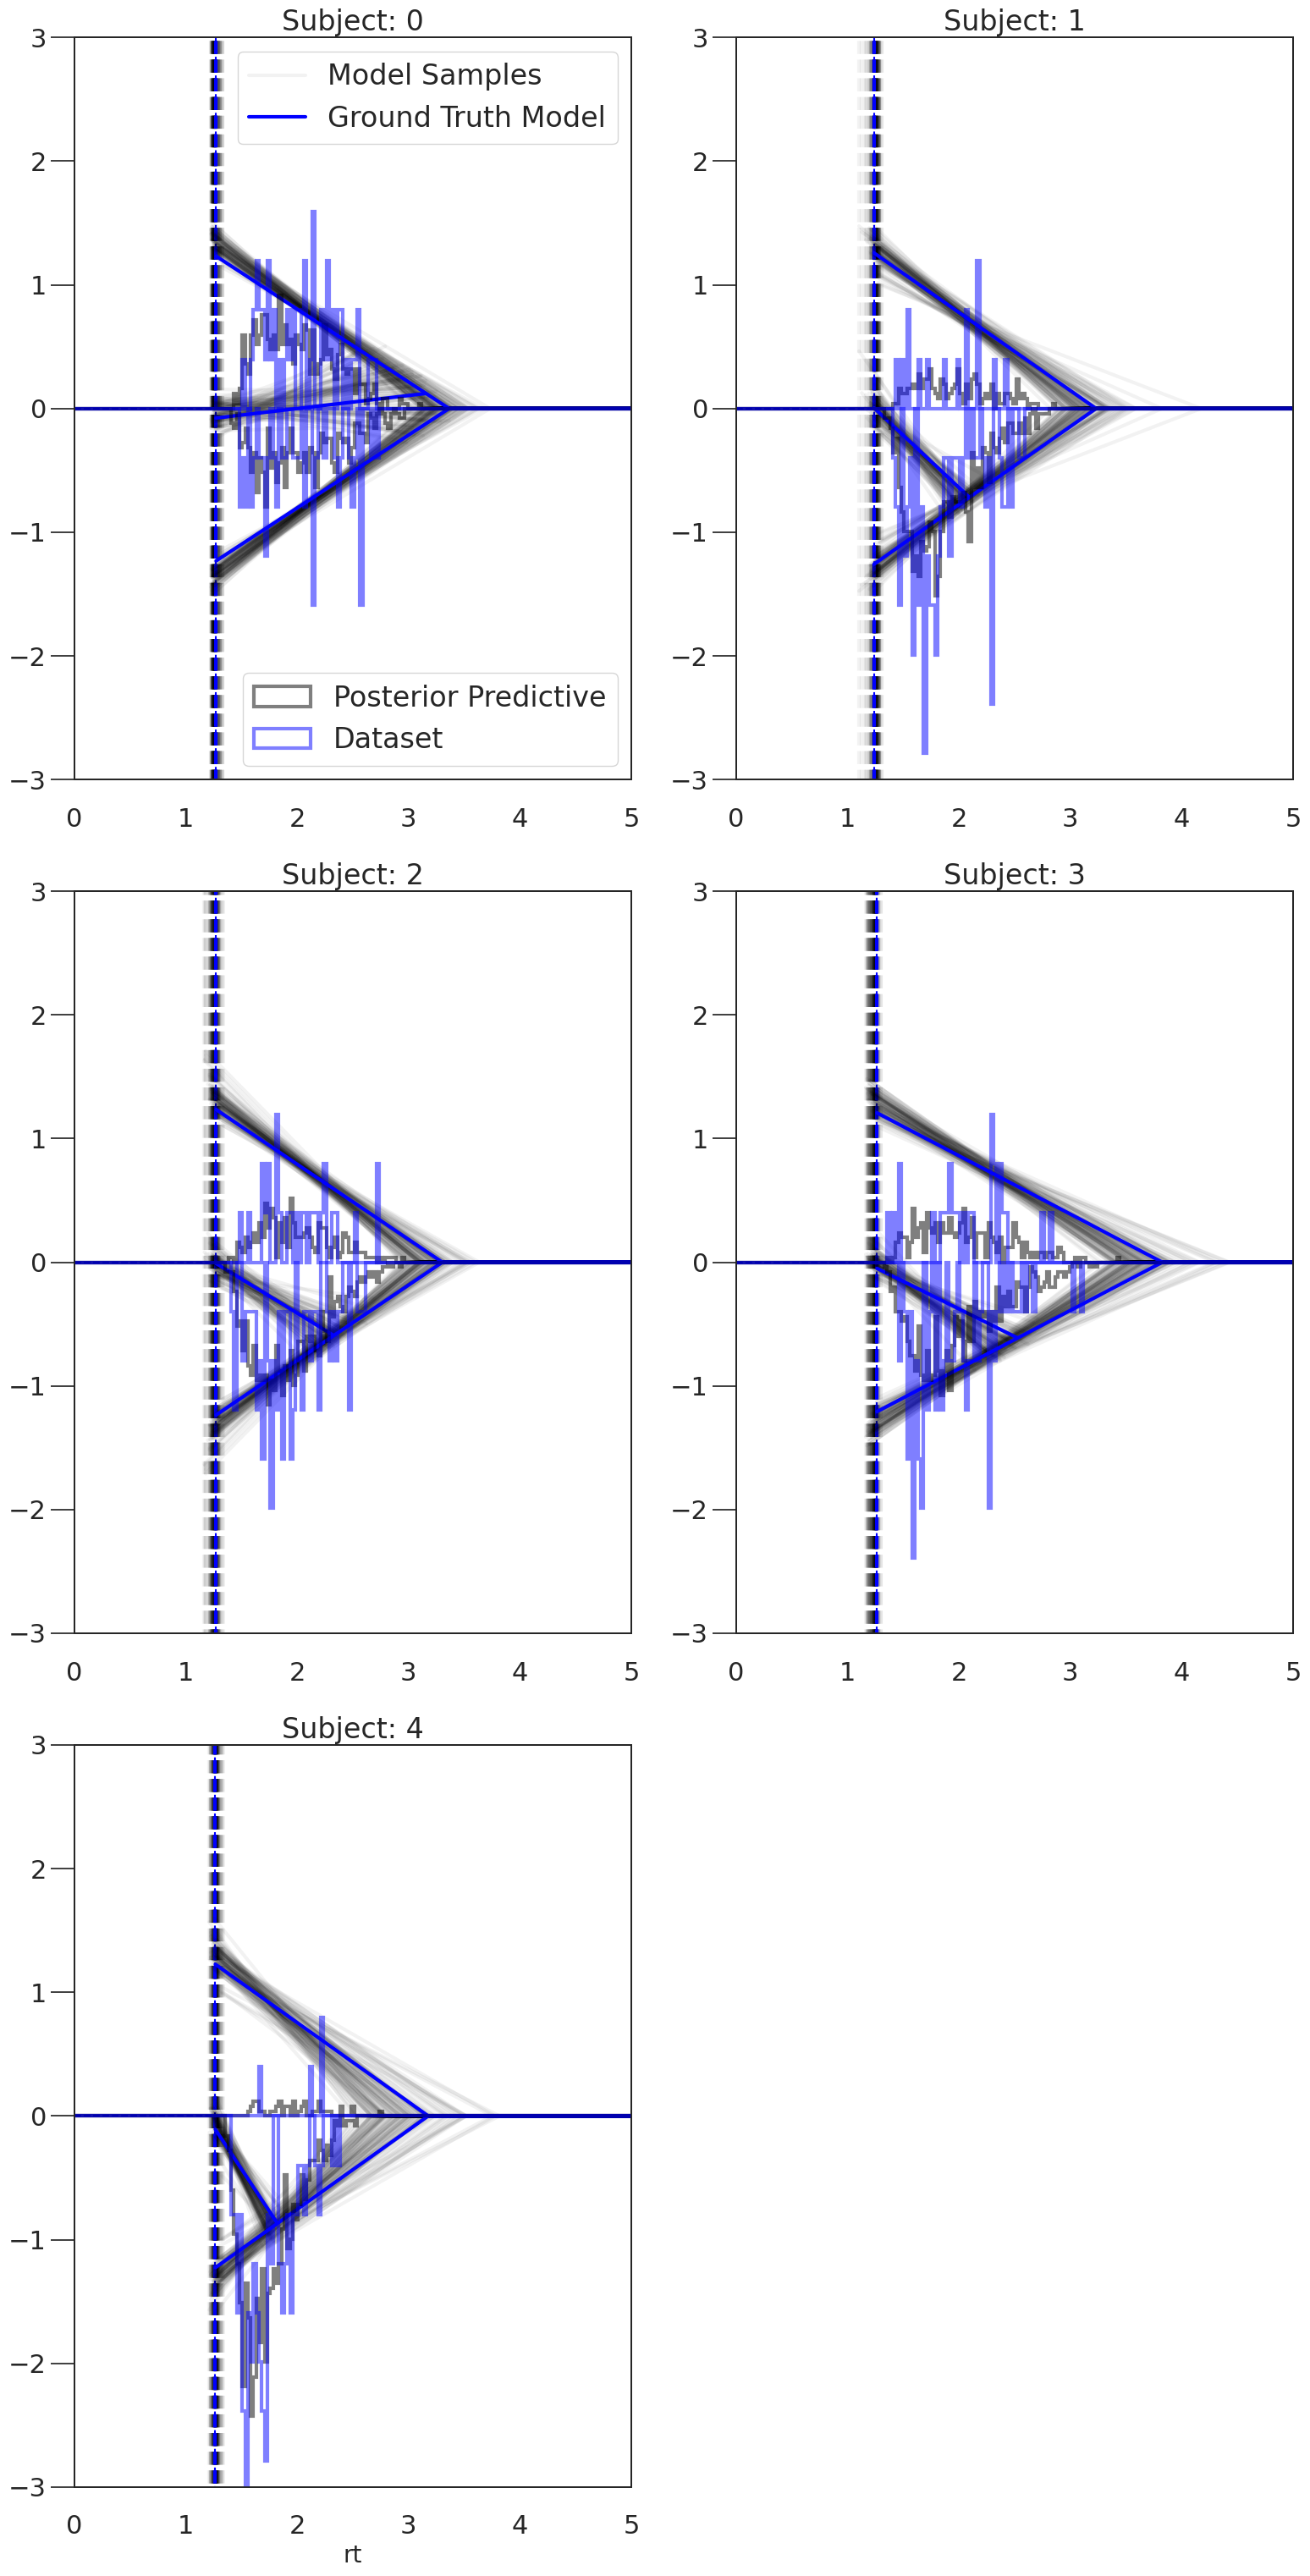

In [32]:
hddm.plotting.model_plot(hddm_model = hddmnn_model,
                         model_ground_truth = model,
                         n_posterior_parameters = 100,
                         scale_x = 0.8,
                         scale_y = 0.6,
                         ylimit = 3,
                         cols = 2)

### Note

Above we used the model plot with *empirical data* (here empirical as in our original simulator data, which we fit the model to) as opposed to specificying. Such *empirical data*, supplied under the `ground_truths_data = ...` argument is signified in <span style="color:blue"> **blue** </span>. This is in contrast to supplying a *ground truth model* under `model_ground_truth = ...`, with corresponding *ground truth parameterization* (potentially multiple for subject and / or condition separated datasets) under `ground_truths_parameters = ...`, where the `model_plot()` will simulate data for these on the fly. Empirical data doesn't have a *true* model of course, so we *don't* see a <span style="color:blue"> **blue** </span> model caricature here, but simply our posterior model parameterizations.

### Posterior Pair Plot

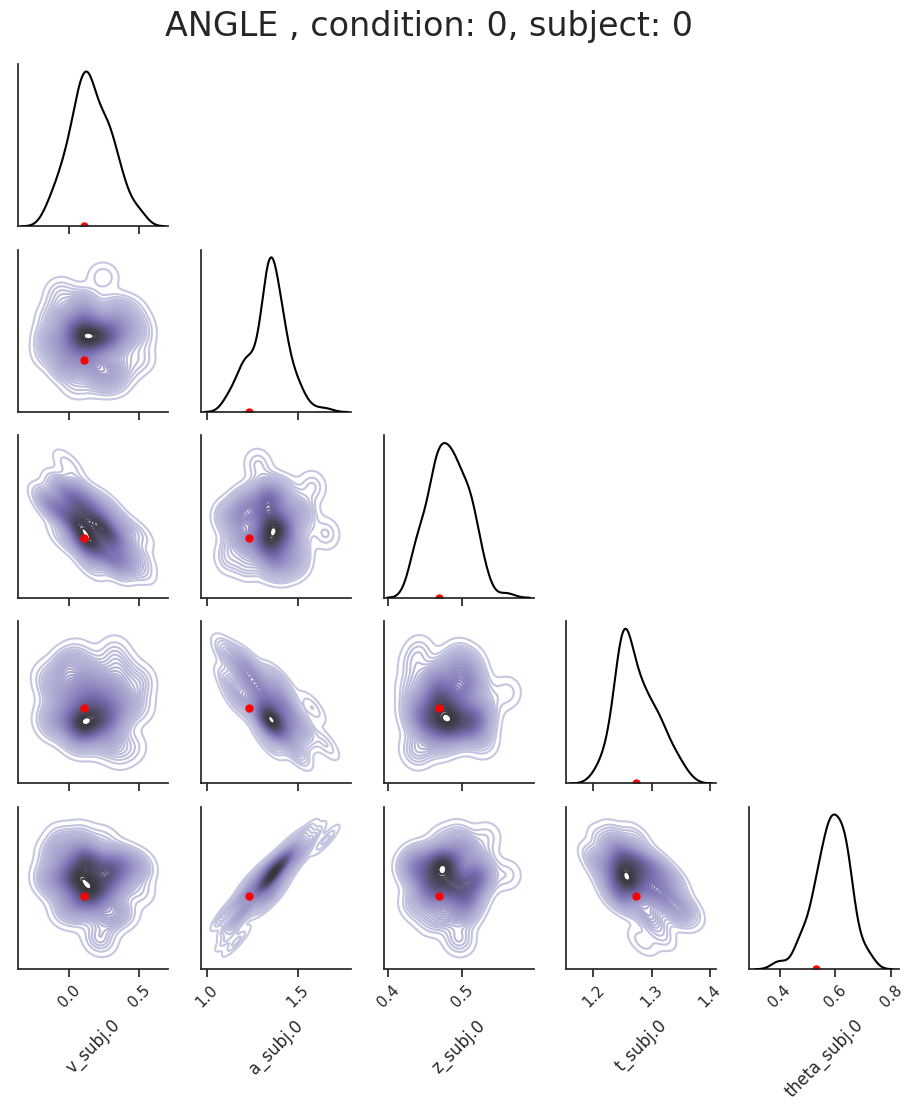

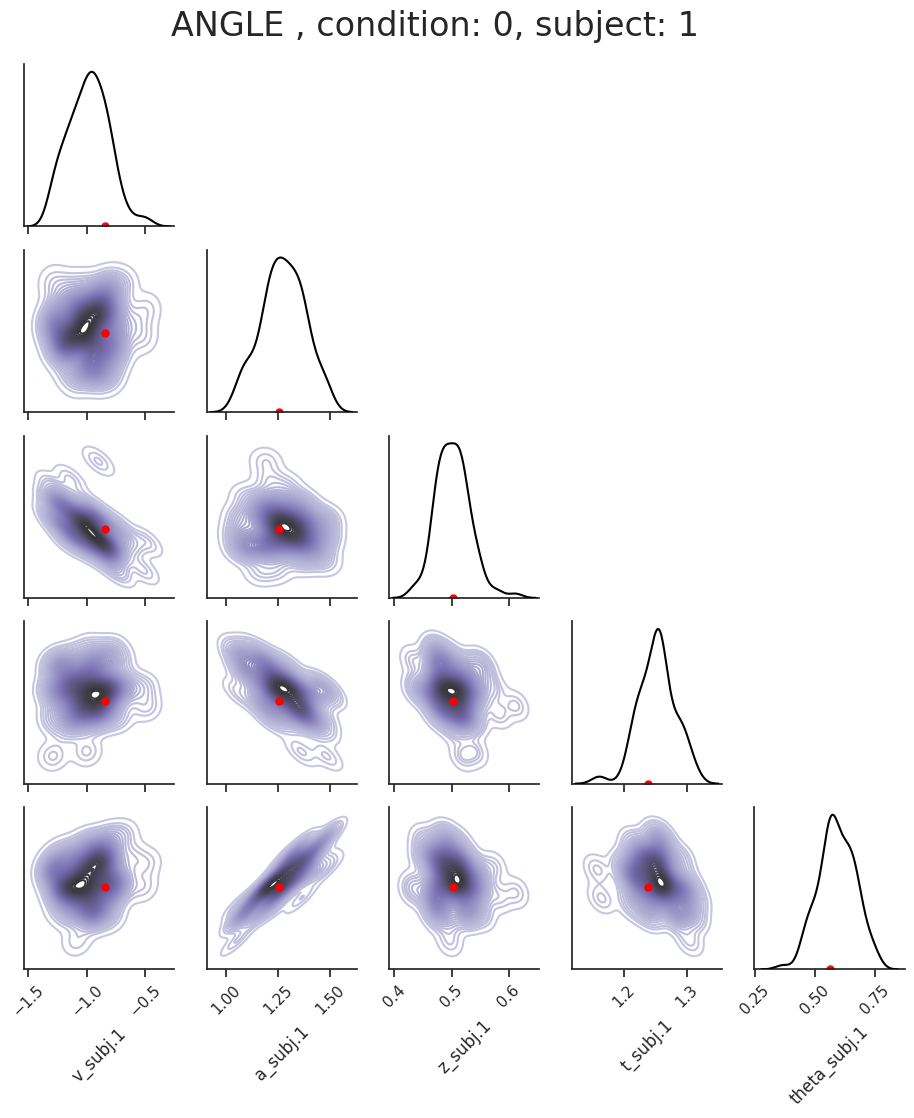

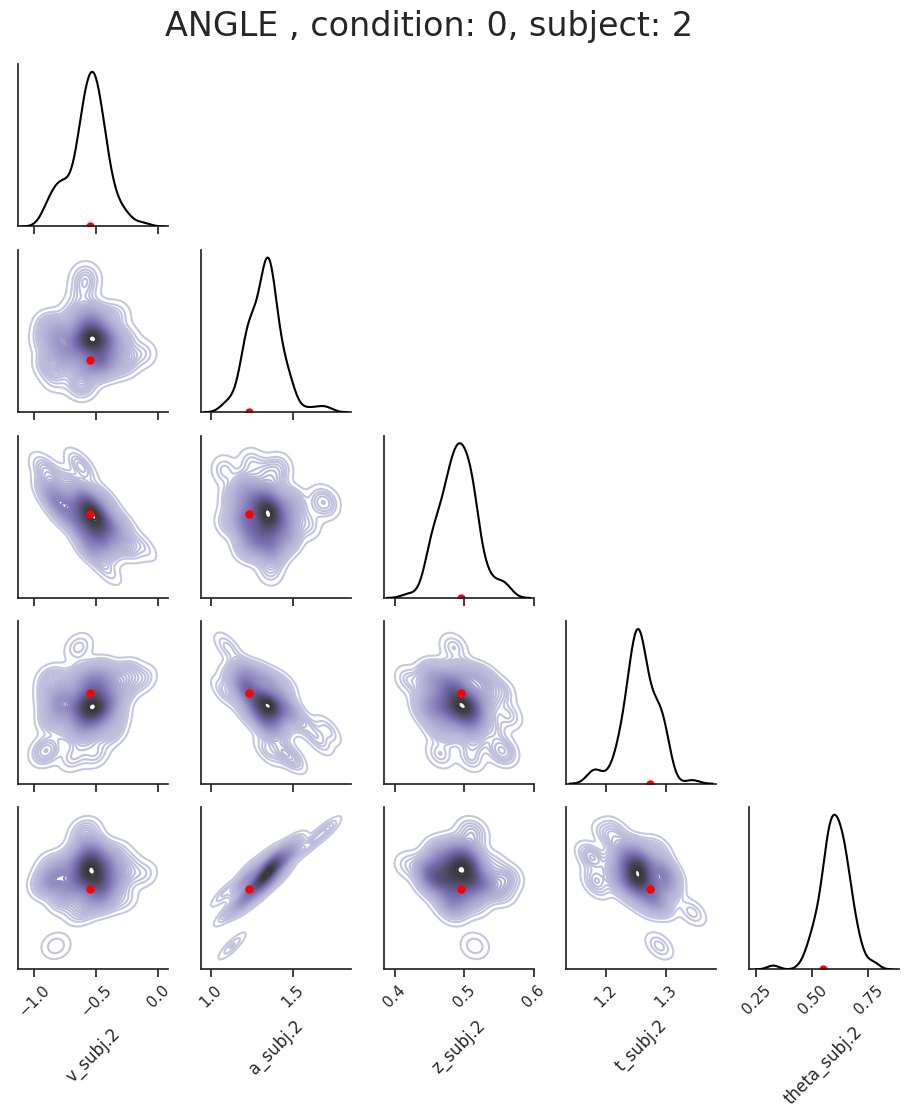

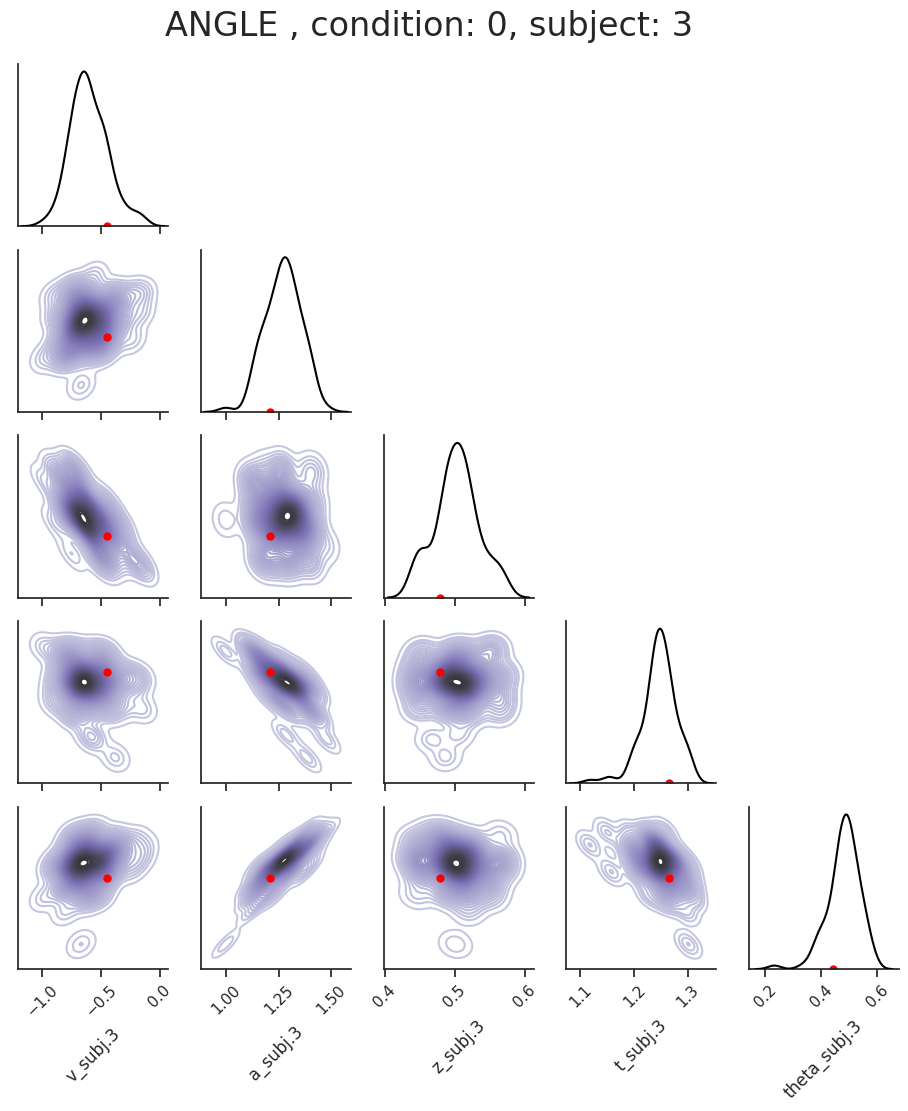

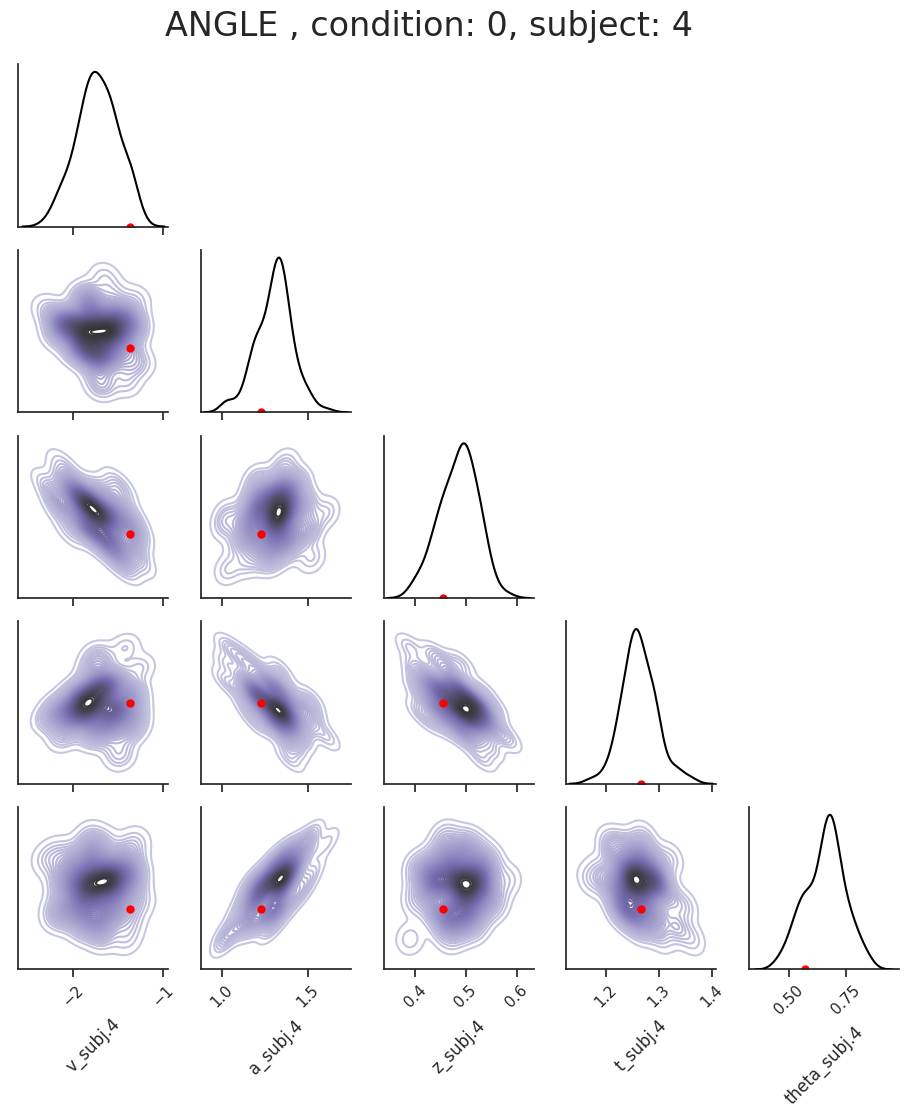

In [33]:
out = hddm.plotting.posterior_pair_plot(hddm_model = hddmnn_model,
                                  model_ground_truth = model,
                                  axes_limits = 'samples',
                                  height = 2,
                                  aspect_ratio = 1,
                                  n_subsample = 100,
                                  font_scale = 1.0
                                  )